#### Name:PAULINE WAMBUI
#### Project:SYRIATEL TELECOMMUNICATION COMPANY
#### Instructor:Samuel Karu

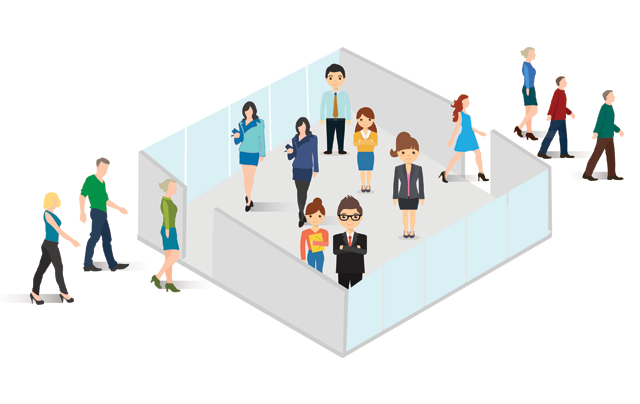

### BUSINESS OVERVIEW
SyriaTel is a telecommunication company in Syria that is facing customer churn.Its trying to identify customers with high risk of leaving and how to retain them.Customer churn can be a major source of revenue loss for a telecom company, as it can be costly to acquire new customers to replace those who leave.Overall, we are looking on how to build a classifier whose main goal is to predict customer churn in order help the telecom company to retain valuable customers, reduce revenue loss, and improve customer satisfaction. This can ultimately lead to increased revenue and profitability for the company.

### BUSINESS PROBLEM
SyriaTel a communication company is looking on how to reduce churn rate in their company.Churn prediction is a technique used by companies to identify customers who are most likely to stop using their products or services.By using the dataset provided we are going to be exploring the features provided in order to create a classifier that can predict the likelihood of a customer churning and also the factors that lead to high customer churning.with creation of an effective model Syriatel will be able to identify their weaknesses and how to improve inorder to be able to maintain their customers and reduce customers leaving.

## objectives
The main objectives of our project are
  
   1.our main objective is to identify the features that lead to high customer churning  and to what extent
  
   2.To create predictive,supervised models that can predict churn 
   
   3.To identify ways in which we can reduce customer churning by comparing with features causing it.e.g they can improve their     customer service calls 
   
   4.What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions

##### DATA UNDERSTANDING

In [198]:
#DATA MANIPULATION
import pandas as pd
import numpy as np

#VISUALISATION

import matplotlib.pyplot as plt
import seaborn as sns

# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [196]:
#loading the data
data=pd.read_csv('customer churn.csv')
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

### Column description

***state***. 2-letter code of the US state of customer residence

***account_length***. Number of months the customer has been with the current telco provider

***area_code***="area_code_AAA" where AAA = 3 digit area code.

***international_plan***, (yes/no). The customer has international plan.

***voice_mail_plan, (yes/no)***. The customer has voice mail plan.

***number_vmail_messages***, numerical. Number of voice-mail messages.

***total_day_minutes***. Total minutes of day calls.

***total_day_calls***. Total minutes of day calls.

***total_day_charge***. Total charge of day calls.

***total_eve_minutes***. Total minutes of evening calls.

***total_eve_calls***. Total number of evening calls.

**total_eve_charge***. Total charge of evening calls.

***total_night_minutes*** . Total minutes of night calls.

***total_night_calls***. Total number of night calls.

***total_night_charge***. Total charge of night calls.

***total_intl_minutes***. Total minutes of international calls.

***total_intl_calls***. Total number of international calls.

***total_intl_charge***. Total charge of international calls

***number_customer_service_calls***. Number of calls to customer service

***churn, (yes/no)***. Customer churn - target variable.

***customer service call***- number of customer service calls made by clients

In [154]:
cat_vars = []
num_vars = []

for col in data.columns:
    if data[col].dtype == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)
num_vars.pop(-1)
cat_vars.pop(1)     
print('Categorical variables:', cat_vars)
print('Numerical variables:', num_vars)

Categorical variables: ['state', 'international plan', 'voice mail plan']
Numerical variables: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [155]:
def describe_columns(self):
    print(self.columns)
    print(self.dtypes)
    print(self.shape)
    print(self.info())
    print(self.describe())
    print(self.isna)

In [156]:
describe_columns(data)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night 

In [157]:
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [158]:
def data_cleaning(data):
    missing_values = data.isna().sum().sum()
    duplicated_values = data.duplicated().sum()
    print(f"missing values :{missing_values}\nduplicated values:{duplicated_values}")
data_cleaning(data)

missing values :0
duplicated values:0


In [159]:
#dropping the phone number columns
data.drop(['phone number'], axis=1,inplace=True)
data.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### Visualisations

##### Numerical visualisation

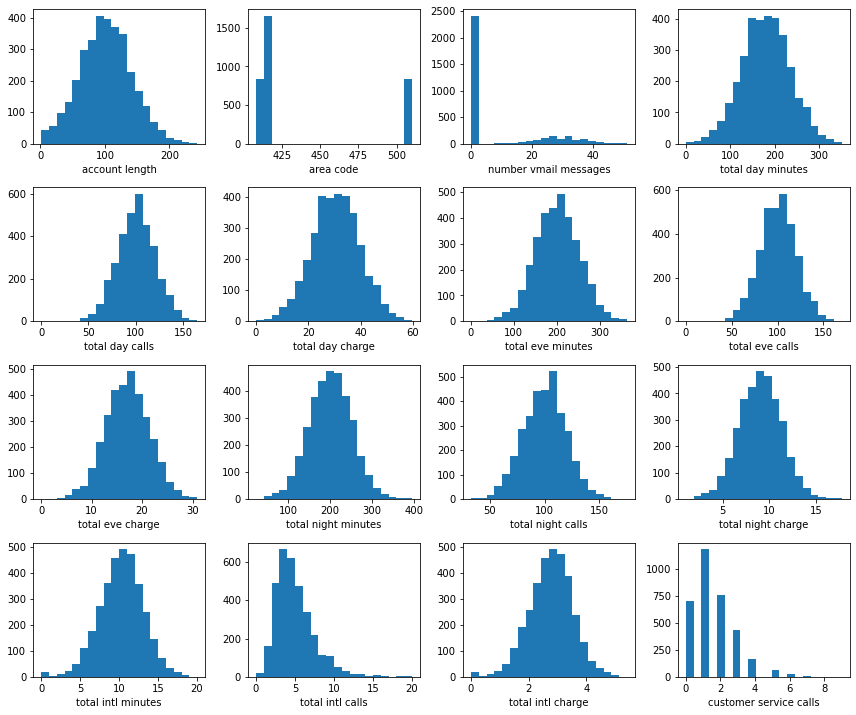

In [160]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(num_vars, 1):
    plt.subplot(4, 4, i)
    plt.hist(data[feature], bins=20)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


From the graphs above we get to see that most of the most of the numerical variables are normally distributed 

### Categorical variables distribution 

In [161]:
#Transform the voicemail column to binary values for easy coding
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

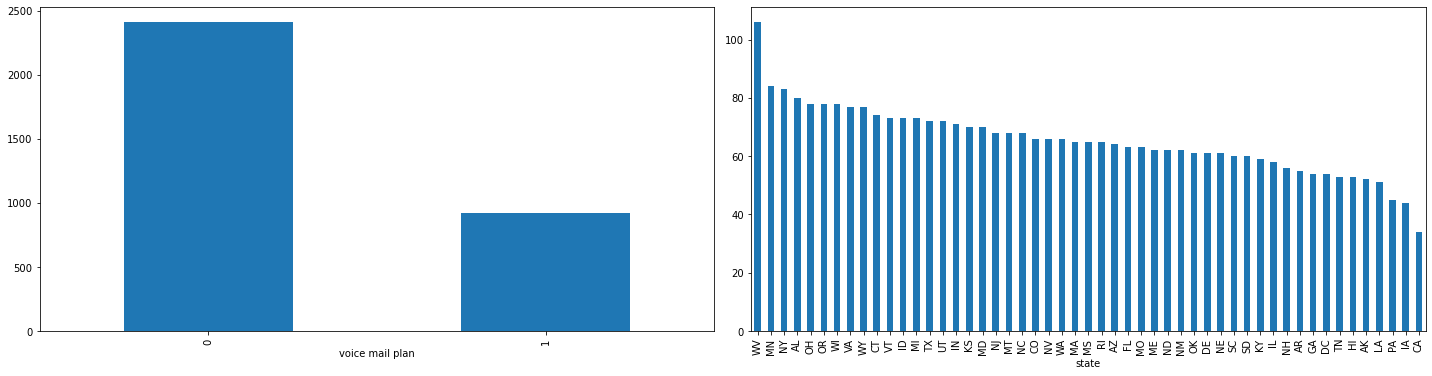

In [162]:
categorical_vars=data[['voice mail plan','state']]
plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    data[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

The graphs above we plot the distribution for categorical variables

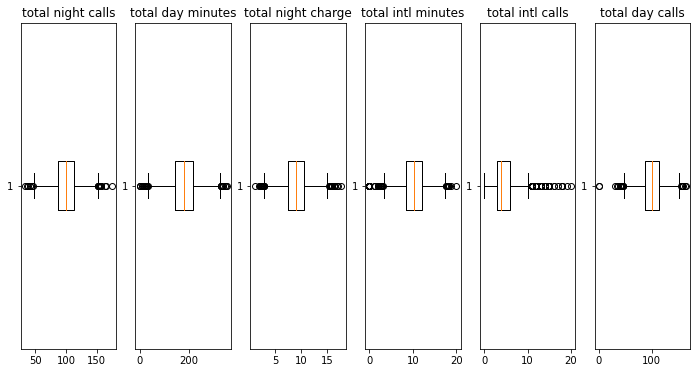

In [163]:
num_cols = ["total night calls", "total day minutes", "total night charge","total intl minutes","total intl calls","total day calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(data[col], vert=False)
    axes[i].set_title(col)

plt.show()

from the boxplots we get to see that the outliers in the dataset but since they  did not have much effect I did not drop them

#### Relationship between columns and churn target variable

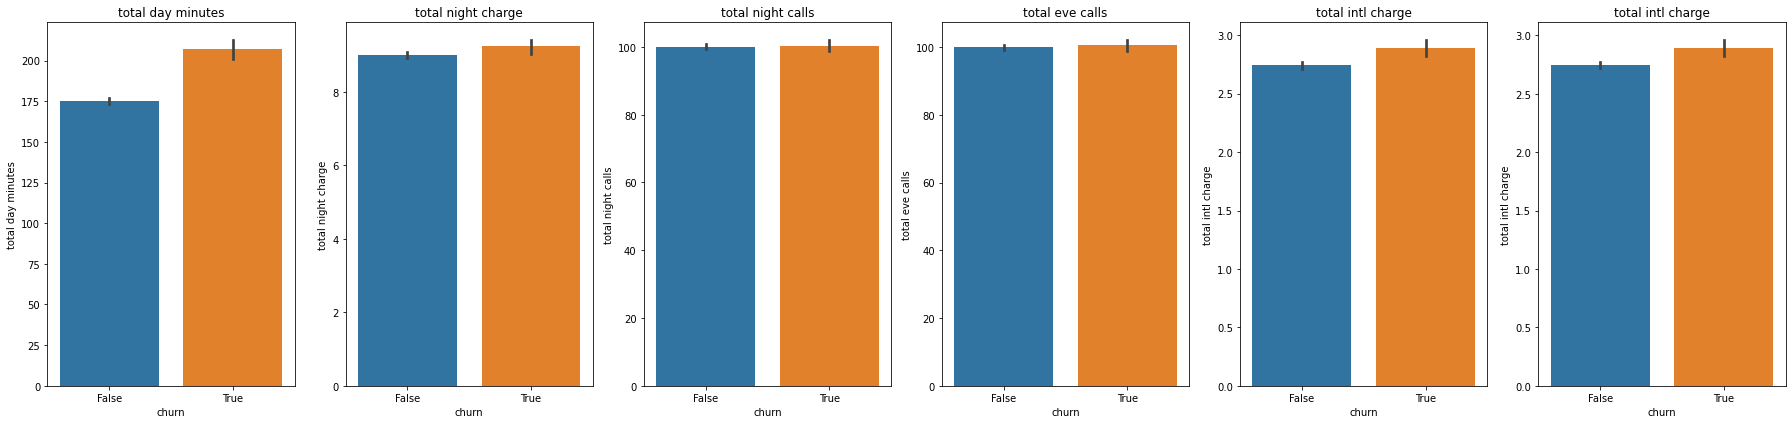

In [164]:
import seaborn as sns

numerical_columns=["total day minutes","total night charge","total night calls","total eve calls","total intl charge","total intl charge"]


fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(25, 6))

# plot bar plot for each numeric column
for i, col in enumerate(numerical_columns):
    sns.barplot(x="churn", y=col, data=data, ax=axes[i])
    axes[i].set_title(col)


# adjust spacing between subplots
plt.tight_layout()

# display the plot
plt.show()

From the bargraphs above we get to see that most of the numerical variables did not affect the churn rate.However totalday minutes,and total international charge do affect the rate of customers leaving


#### Next we visualize the churned column in order to understand the pecrcentage of customers who are likely to churn and those likely to  remain

In [165]:
print("Churn Counts")
print(data["churn"].value_counts())
print()
print("Percentages")
print(data["churn"].value_counts(normalize=True))

Churn Counts
False    2850
True      483
Name: churn, dtype: int64

Percentages
False    0.855086
True     0.144914
Name: churn, dtype: float64


we get to see that 14% of customers churn every year

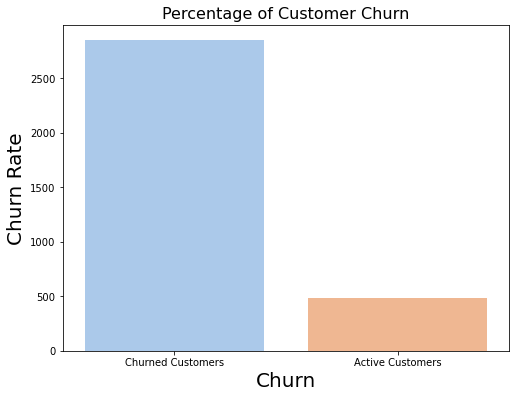

In [166]:
# Percentages of current customers vs customer churn
# churn_per = data["churn"].value_counts(normalize=True)

# Plot of percentages 
fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data=data, x='churn',palette="pastel")
plt.title('Percentage of Customer Churn', fontsize = 16)
#ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['Churned Customers', 'Active Customers']);
#plt.tight_layout()   

from  the bar graph above we get to see that the customers who were going to churn were way fewer than those not  willing to churn


#### Churn rate for the average number of customer service calls

In [167]:
cust_serv_calls = pd.DataFrame(data.groupby(['customer service calls'])['churn'].mean())
cust_serv_calls

churn
customer service calls          
0                       0.131994
1                       0.103302
2                       0.114625
3                       0.102564
4                       0.457831
5                       0.606061
6                       0.636364
7                       0.555556
8                       0.500000
9                       1.000000

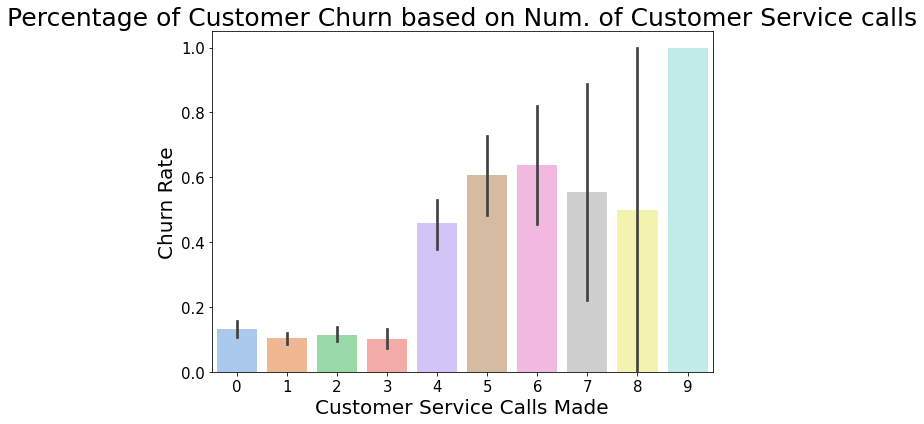

In [168]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['customer service calls'], y = 'churn',palette="pastel", ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
#plt.savefig('figures/cust_serv_call_churn.png')

The graph clearly shows a significant increase in the likelihood of customer churn when they make four or more calls to customer service.When the number of service calls reaches a maximum of nine, the churn rate reaches 100%. Looking at this in a business perspective, new strategies must be discussed to handle unhappy customers when they are calling customer service by the fourth time.

#### Churn rate for the average number of international calls

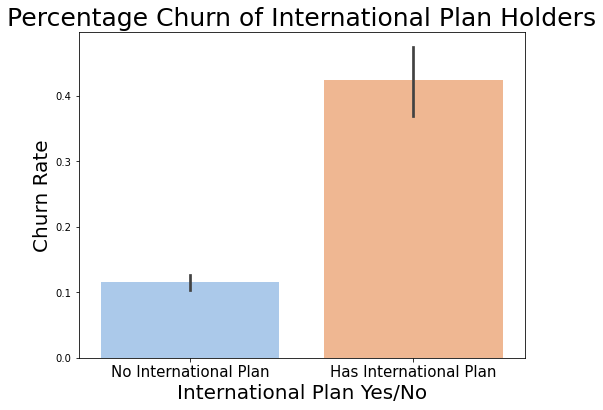

In [169]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=data, x=data['international plan'], y='churn', palette="pastel", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

from the graph above many of the customers with international plan get to churn.This shows that the phone services are not satisfying them especially when they are out of the country.we therefore recommend SyriaTel to conduct a further research on the causes of the high customer churn to holders of international plan so as to reduce the high rate of churning.

In [170]:
data.corr().churn

account length            0.016541
area code                 0.006174
voice mail plan          -0.102148
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

from the correlation matrix we get to see that customer service calls,total day minutes and internationa minutes have high correlation with churn.Most of the fetures do not have high correlation with the target column

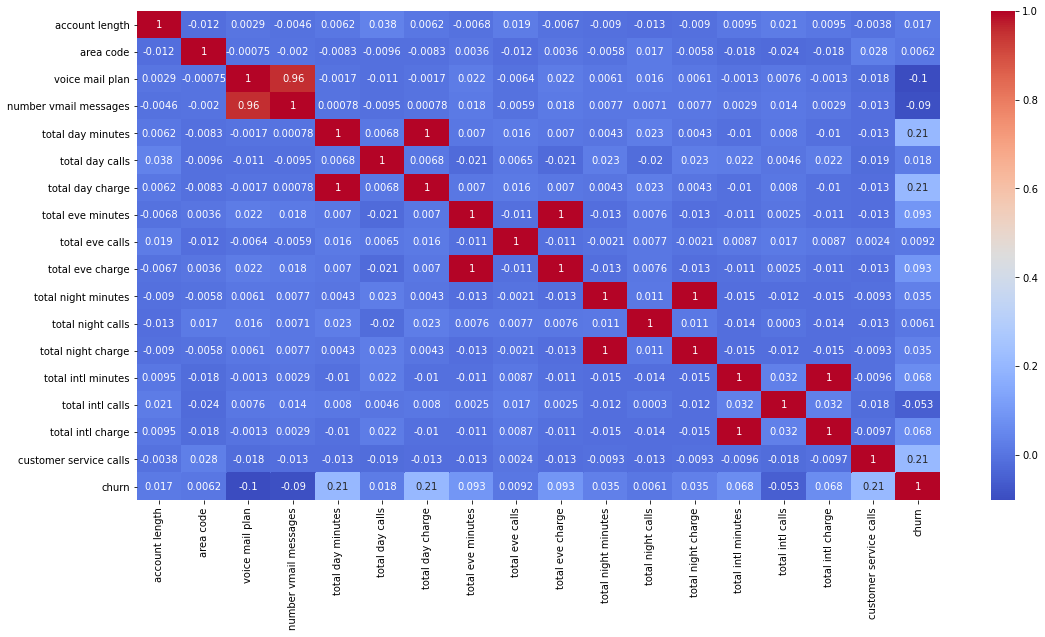

In [171]:
df = pd.DataFrame(data)
plt.figure(figsize=(18, 9))
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm')

# Show the plot
plt.show()

The heatmap above shows that the correlation  between the different features of the dataset.we get to see that most of the features are not highly correlated

### Feature engineering

Transforming the international plan and the churn columns to binary values for compatibility with numerical algorithms

In [172]:
data = pd.get_dummies(data, columns =["international plan"], drop_first = True)
data

state  account length  area code  voice mail plan  number vmail messages  \
0       KS             128        415                1                     25   
1       OH             107        415                1                     26   
2       NJ             137        415                0                      0   
3       OH              84        408                0                      0   
4       OK              75        415                0                      0   
...    ...             ...        ...              ...                    ...   
3328    AZ             192        415                1                     36   
3329    WV              68        415                0                      0   
3330    RI              28        510                0                      0   
3331    CT             184        510                0                      0   
3332    TN              74        415                1                     25   

      total day minutes  total day calls  total day charge  total eve minutes  \
0                 265.1              110             45.07              197.4   
1                 161.6              123             27.47              195.5   
2                 243.4              114             41.38              121.2   
3                 299.4               71             50.90               61.9   
4                 166.7              113             28.34              148.3   
...                 ...              ...               ...                ...   
3328              156.2               77             26.55              215.5   
3329              231.1               57             39.29              153.4   
3330              180.8              109             30.74              288.8   
3331              213.8              105             36.35              159.6   
3332              234.4              113             39.85              265.9   

      total eve calls  total eve charge  total night minutes  \
0                  99             16.78                244.7   
1                 103             16.62                254.4   
2                 110             10.30                162.6   
3                  88              5.26                196.9   
4                 122             12.61                186.9   
...               ...               ...                  ...   
3328              126             18.32                279.1   
3329               55             13.04                191.3   
3330               58             24.55                191.9   
3331               84             13.57                139.2   
3332               82             22.60                241.4   

      total night calls  total night charge  total intl minutes  \
0                    91               11.01                10.0   
1                   103               11.45                13.7   
2                   104                7.32                12.2   
3                    89                8.86                 6.6   
4                   121                8.41                10.1   
...                 ...                 ...                 ...   
3328                 83               12.56                 9.9   
3329                123                8.61                 9.6   
3330                 91                8.64                14.1   
3331                137                6.26                 5.0   
3332                 77               10.86                13.7   

      total intl calls  total intl charge  customer service calls  churn  \
0                    3               2.70                       1  False   
1                    3               3.70                       1  False   
2                    5               3.29                       0  False   
3                    7               1.78                       2  False   
4                    3               2.73                       3  False   
...                ...       

In [173]:
data['churn'] = data['churn'].astype('int8')
data

state  account length  area code  voice mail plan  number vmail messages  \
0       KS             128        415                1                     25   
1       OH             107        415                1                     26   
2       NJ             137        415                0                      0   
3       OH              84        408                0                      0   
4       OK              75        415                0                      0   
...    ...             ...        ...              ...                    ...   
3328    AZ             192        415                1                     36   
3329    WV              68        415                0                      0   
3330    RI              28        510                0                      0   
3331    CT             184        510                0                      0   
3332    TN              74        415                1                     25   

      total day minutes  total day calls  total day charge  total eve minutes  \
0                 265.1              110             45.07              197.4   
1                 161.6              123             27.47              195.5   
2                 243.4              114             41.38              121.2   
3                 299.4               71             50.90               61.9   
4                 166.7              113             28.34              148.3   
...                 ...              ...               ...                ...   
3328              156.2               77             26.55              215.5   
3329              231.1               57             39.29              153.4   
3330              180.8              109             30.74              288.8   
3331              213.8              105             36.35              159.6   
3332              234.4              113             39.85              265.9   

      total eve calls  total eve charge  total night minutes  \
0                  99             16.78                244.7   
1                 103             16.62                254.4   
2                 110             10.30                162.6   
3                  88              5.26                196.9   
4                 122             12.61                186.9   
...               ...               ...                  ...   
3328              126             18.32                279.1   
3329               55             13.04                191.3   
3330               58             24.55                191.9   
3331               84             13.57                139.2   
3332               82             22.60                241.4   

      total night calls  total night charge  total intl minutes  \
0                    91               11.01                10.0   
1                   103               11.45                13.7   
2                   104                7.32                12.2   
3                    89                8.86                 6.6   
4                   121                8.41                10.1   
...                 ...                 ...                 ...   
3328                 83               12.56                 9.9   
3329                123                8.61                 9.6   
3330                 91                8.64                14.1   
3331                137                6.26                 5.0   
3332                 77               10.86                13.7   

      total intl calls  total intl charge  customer service calls  churn  \
0                    3               2.70                       1      0   
1                    3               3.70                       1      0   
2                    5               3.29                       0      0   
3                    7               1.78                       2      0   
4                    3               2.73                       3      0   
...                ...       

## MODELLING

In [174]:
X=data.drop(data[['churn', 'state']], axis=1)
y=data['churn']

In [175]:
X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3) 

##### Checking for data imbalance

In [176]:
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    1993
1     340
Name: churn, dtype: int64


0    857
1    143
Name: churn, dtype: int64


In [177]:
#Balancing the data

sm=SMOTE()
X_train_resample,y_train_resample=sm.fit_resample(X_train,y_train)


In [178]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resample)
X_test_scaled=scaler.transform(X_test)
scaled_df_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaled_df_train.head()

account length  area code  voice mail plan  number vmail messages  \
0       -0.557469   1.698505        -0.470320              -0.533079   
1       -1.012927   1.698505        -0.470320              -0.533079   
2        0.407030   1.698505         2.126212               0.444651   
3       -0.798594  -0.530632        -0.470320              -0.533079   
4        0.514197   1.698505         2.126212               2.970454   

   total day minutes  total day calls  total day charge  total eve minutes  \
0           0.166861         0.936858          0.167002           1.100668   
1          -0.965586         1.147423         -0.965917          -2.806208   
2           0.469933         0.410446          0.469880          -1.107566   
3           1.413367         0.515728          1.413020          -0.314867   
4          -0.232347         0.884217         -0.232683          -0.620218   

   total eve calls  total eve charge  total night minutes  total night calls  \
0        -1.776551          1.101353            -0.521006           0.638349   
1        -2.044515         -2.805097            -0.876575           1.123347   
2         0.956685         -1.106434            -0.487540          -1.086087   
3        -1.776551         -0.314200             1.106245          -0.870533   
4        -1.615772         -0.621101            -0.857750           0.907792   

   total night charge  total intl minutes  total intl calls  \
0           -0.522381           -0.496756          0.390388   
1           -0.875616           -0.228151         -0.934694   
2           -0.485198           -0.573500          0.832082   
3            1.104363            0.462548          1.273776   
4           -0.857025            0.385804         -0.051306   

   total intl charge  customer service calls  international plan_yes  
0          -0.503181                0.912244               -0.315573  
1          -0.233177                0.912244               -0.315573  
2          -0.574235                0.227460               -0.315573  
3           0.463150               -1.142108               -0.315573  
4           0.392097               -0.457324               -0.315573

#### functions for modelling

In [179]:
def score(model):
    X = X_train_scaled
    X1 = X_test_scaled
    y = y_train_resample
    y1 = y_test
    
    fitting = model.fit(X,y)
    scoring = model.score(X1, y1)
    model_cv = cross_val_score(model, X, y)
    
    return scoring, model_cv

In [180]:
def report(model):
    X = X_train_scaled
    X1 = X_test_scaled
    y = y_train_resample
    y1 = y_test

    fitting = model.fit(X, y)  # Fit the model with training data
    y_predicting = model.predict(X1)
    model_report = classification_report(y1, y_predicting)
    model_roc_auc = roc_auc_score(y1, y_predicting)

    return model_report, model_roc_auc

#### Model 1 Logistic regression

In [181]:
model = LogisticRegression(random_state=42)
score_result, cv_result = score(model)

print("Score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Score:
	 0.737

Cross Validation:
	 [0.71177945 0.77038896 0.74153074 0.75156838 0.74780427]


In [182]:
model = LogisticRegression(random_state=42)
report_result, roc_auc_result = report(model)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       857
           1       0.32      0.73      0.44       143

    accuracy                           0.74      1000
   macro avg       0.63      0.74      0.64      1000
weighted avg       0.85      0.74      0.77      1000


ROC AUC Score:
0.735860988486426


#### Model 2 

####  Decision trees

In [183]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
score_result, cv_result = score(model)

print("Tree_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

Tree_score:
	 0.906

Cross Validation:
	 [0.83458647 0.78670013 0.79422836 0.79297365 0.80301129]


In [205]:
model = DecisionTreeClassifier(random_state=42)
report_result, roc_auc_result = report(model)

print("Tree Classification Report:")
print(report_result)
print("\n Tree ROC AUC Score:")
print(roc_auc_result)

Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       857
           1       0.49      0.75      0.59       143

    accuracy                           0.85      1000
   macro avg       0.72      0.81      0.75      1000
weighted avg       0.89      0.85      0.86      1000


 Tree ROC AUC Score:
0.8081982195167726


In [204]:
def conf_matrix(model):
    X = X_train_scaled
    X1 = X_test_scaled
    y = y_train_resample
    y1 = y_test
    
    
    y_predicting = model.predict(X1)
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X, y)
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y1, y_predicting)
    
    return dis_estimator, dis_predictor

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24e6acc0af0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24e70a7e640>)

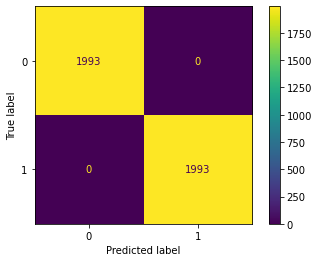

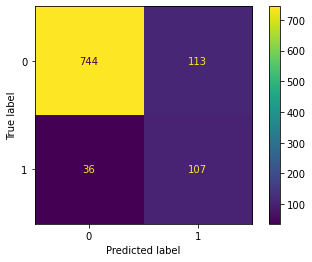

In [186]:
conf_matrix(model)

### Model 3

#### KNN MODELLING 

In [187]:
model = KNeighborsClassifier(n_neighbors=5)
score_result, cv_result = score(model)
report_result, roc_auc_result = report(model)

print("knn_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)


knn_score:
	 0.777

Cross Validation:
	 [0.86466165 0.8782936  0.87452949 0.87327478 0.87954831]


In [188]:
model = KNeighborsClassifier(n_neighbors=5)
report_result, roc_auc_result = report(model)

print("Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       857
           1       0.36      0.73      0.48       143

    accuracy                           0.78      1000
   macro avg       0.65      0.76      0.67      1000
weighted avg       0.86      0.78      0.80      1000


ROC AUC Score:
0.7591982113569044


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24e6e8fc910>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24e6e909880>)

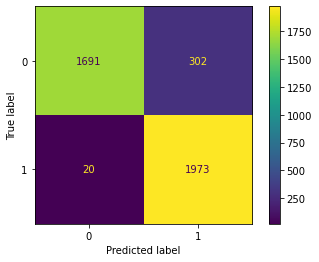

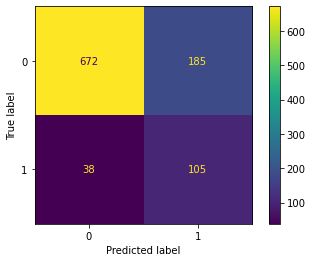

In [189]:
conf_matrix(model)

#### Random forest classifier

In [190]:
rf = RandomForestClassifier(n_estimators=5,random_state=42)
rf.fit(X_train_scaled,y_train_resample)


RandomForestClassifier(n_estimators=5, random_state=42)

In [191]:
model = RandomForestClassifier(n_estimators=5,random_state=42)
score_result, cv_result = score(model)

print("rf_score:")
print("\t", score_result)
print("\nCross Validation:")
print("\t", cv_result)

rf_score:
	 0.881

Cross Validation:
	 [0.86340852 0.89585947 0.90840652 0.91718946 0.89209536]


In [192]:
model = RandomForestClassifier(n_estimators=5,random_state=42)
report_result, roc_auc_result = report(model)

print("rf Classification Report:")
print(report_result)
print("\nROC AUC Score:")
print(roc_auc_result)

rf Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       857
           1       0.57      0.68      0.62       143

    accuracy                           0.88      1000
   macro avg       0.76      0.80      0.77      1000
weighted avg       0.89      0.88      0.89      1000


ROC AUC Score:
0.7965704074222161


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24e6e8e7070>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24e705b0790>)

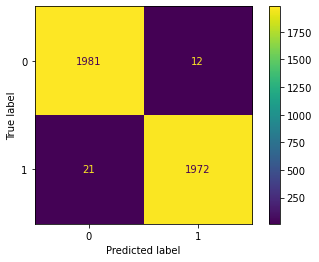

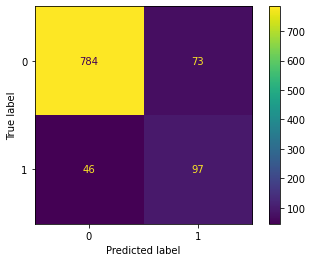

In [193]:
conf_matrix(model)

In [194]:
# Define the hyperparameter grids for the  random forest models
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}


rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)

# Fit the GridSearchCV objects to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best scores for the models
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Train the decision tree and random forest models with the best hyperparameters on the entire training dataset

rf_clf = RandomForestClassifier(**rf_best_params)

rf_clf.fit(X_train, y_train)

# Make predictions on the test data and evaluate the performance of the models using accuracy

rf_y_pred = rf_clf.predict(X_test)

rf_recall = recall_score(y_test, rf_y_pred)

# performance of random forest models based on recall 
print('Random forest has a recall of:', rf_recall)

Random forest has a recall of: 0.6713286713286714


### Evaluation

To evaluate  our models we are going to assess the classification models for forecasting churn in SyriaTel's customer base. I used  recall evaluation metric to predict the success of our models.The models will be used to detect favtors leading to high churn rate and how to reduce it

### Baseline model
Based on the classification report and the ROC AUC score, the model's performance seems to be moderate. The accuracy of the model is 73%, which means that the model has correctly predicted 71% of the samples in the test data. The precision for class 1 is 0.31, which means that out of all the samples that the model predicted as churned , only 31% of them were actually positive. The recall for class 1 is 0.74, which means that out of all the actual positive samples, the model correctly identified 73% of them. This shows that there is room for improvement since logistic regression is our first model

### KNN model
Based on the classification report and the ROC AUC score, this model has a slightly better performance compared to the previous one. The accuracy of this model is 78%, which means that the model has correctly predicted 73% of the samples in the test data. The precision for class 1 is 0.33, which is higher than the previous model, indicating that out of all the samples that the model predicted as positive , 35% of them were actually positive. The recall for class 1 is 0.73, which is the same as the previous model, indicating that out of all the actual positive samples, the model correctly identified 70% of them.



### Random forest
From the  model we get to see that it has a higher precision of 58% but however it has  a recall of 68% which is quite low compared to the rest of the models therefore would not recommend it .Even after trying to tune the model random forest still remained at 68%

### Decision tree model
from the classification report and the ROC AUC score, this model has a significantly better performance compared to the previous two models. The accuracy of this model is 80%, which is higher than the previous two models. The precision for class 1 is 0.49, which is higher than both previous models, indicating that out of all the samples that the model predicted as positive , 46% of them were actually positive. The recall for class 1 is 0.75, which is also higher than both previous models, indicating that out of all the actual positive samples, the model correctly identified 75% of them


### Conclusion

1.Logistic regression:r2 score: 72%
                      Recall:73%
                      Precision:31%                                
                                            
2.Decisiontreeclassifier:r2 score:91%
                      Recall:75%
                      Precision:49%
                      
                      
3.KNNNeighborsclassifier:r2 score:72%
                      Recall:73%
                      Precision:35% 
                      
                      
4.Randomforestclassifier:r2 score:87%
                      Recall:68%
                      Precision:58%                                         

## Recommendation
1.From the models we get to see that the Decision tree has the highest recall and therefore can be used to predict the highest rate of customer churning .I would therefore recommend that they use this model  so that they can be able to predict the rate of customer churning and put necessary measures before hand 


2.From the data we get to see that features such as customer service and international plan highly affect the customer churning rate.Syriatel hould make sure that they improve their services so that they can retain customers and avoid revenue loss

3.Further investigations should be made in order to know what steps to take inorder to reduce churning by atleast 7% from 14% e.g offering incentives to customers,look at the targeted market especially if they have international plan or not so that they can retain their customers